In [1]:
# Adding necessary imports for the data wrangling process
import pandas as pd
import matplotlib.pyplot as plt
import os
import missingno as msno

In [2]:
# Creating a dataframe using the dataset 
df = pd.read_csv('../data/raw/heart_2022_no_nans.csv')

In [3]:
# Checking the first few rows of the dataframe to make sure it loaded in properly
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [4]:
# Listing all column names for reference later
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [5]:
# Listing out all data types to determine numerical from categorical data
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

In [6]:
# Describing the numerical data columns 
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [7]:
# Finding the amount of unique values per column
df.nunique()

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

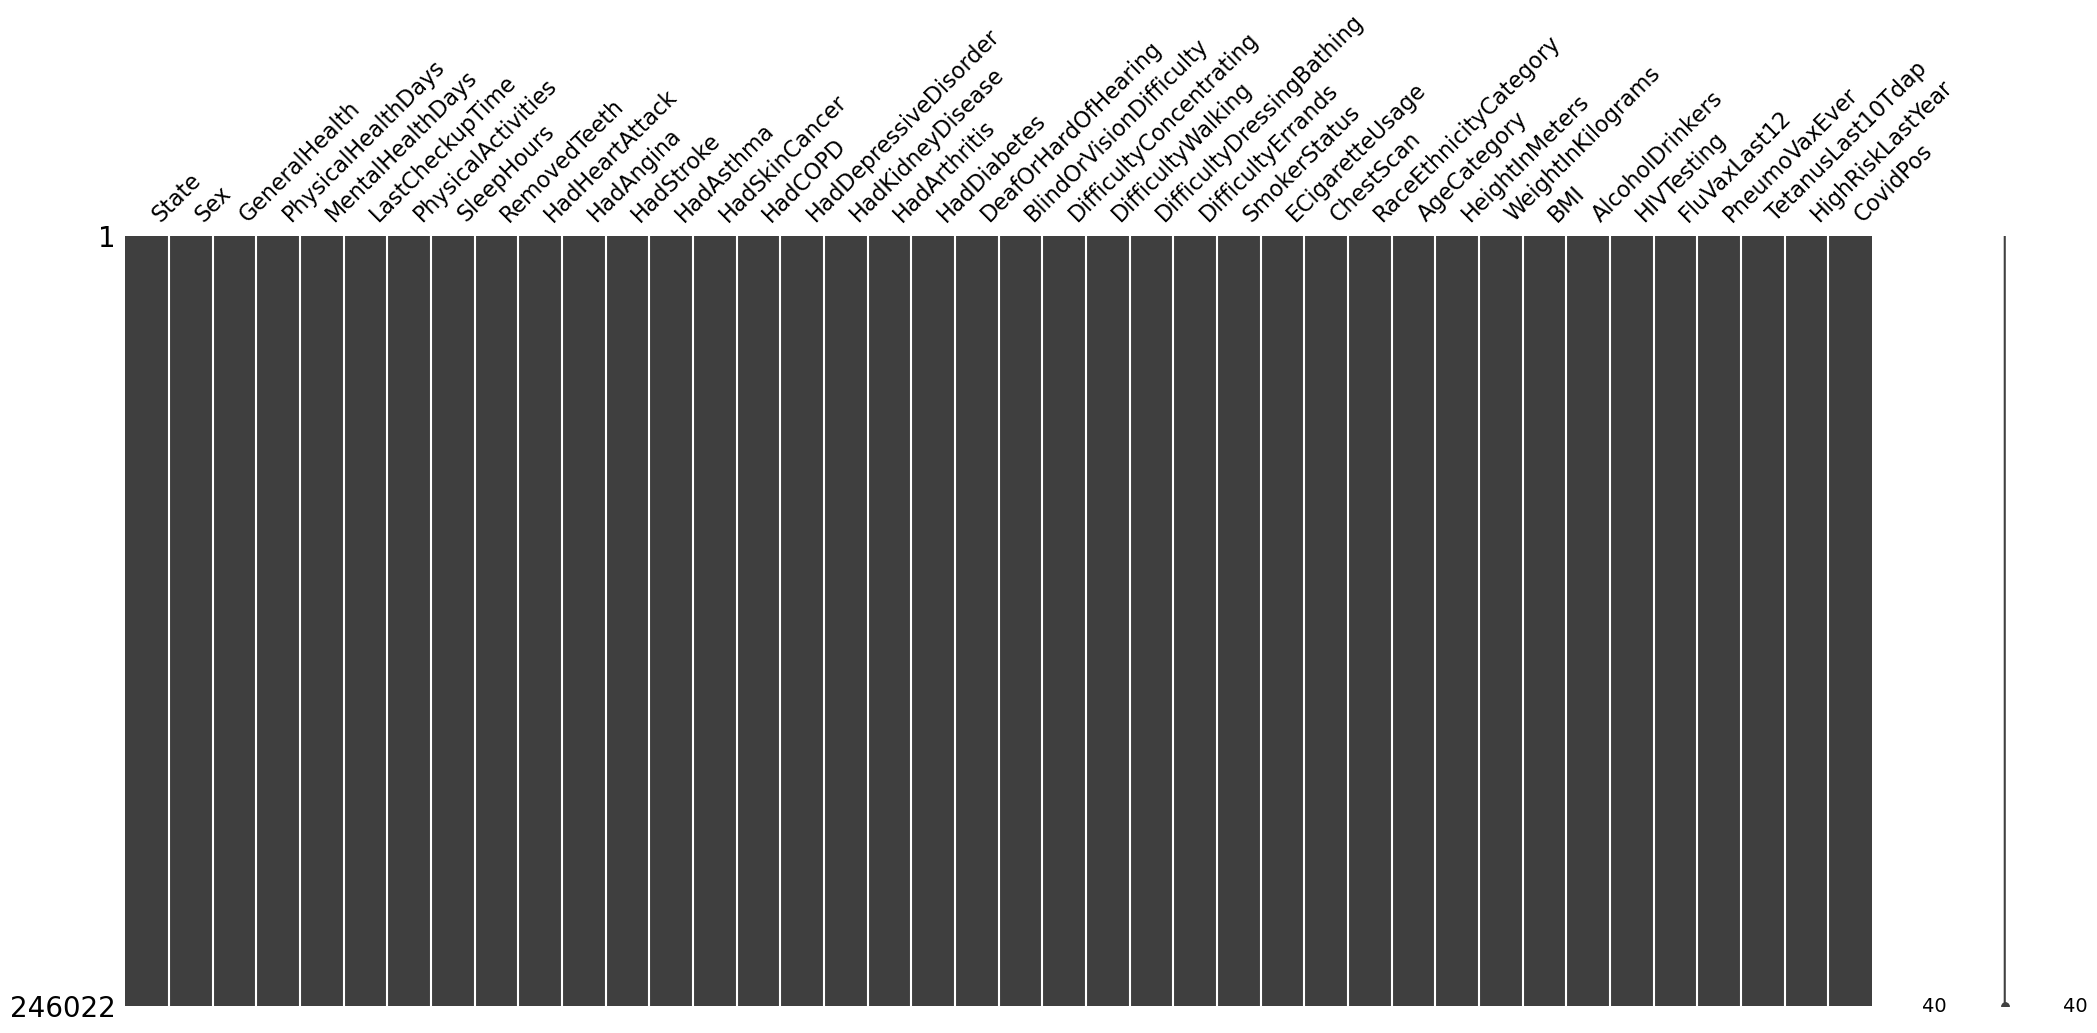

In [8]:
# Looking for missing data
msno.matrix(df)
plt.show()

The data used is complete and no missing values were found.

In [9]:
# Checking to see if any values are duplicated
dupes = df.duplicated()
df[dupes].sort_values(by='State')

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
5702,Arizona,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.63,56.70,21.46,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
87555,Maryland,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.65,45.36,16.64,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
88402,Maryland,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.75,65.77,21.41,Yes,No,Yes,Yes,"Yes, received Tdap",No,No
137645,New Jersey,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.63,80.74,30.55,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
174923,Rhode Island,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.57,68.04,27.44,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
184137,South Dakota,Female,Fair,30.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.75,90.72,29.53,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
208013,Vermont,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.65,79.38,29.12,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
216362,Washington,Male,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.80,77.11,23.71,Yes,Yes,Yes,No,"Yes, received Tdap",No,No
225974,Washington,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,104.33,28.00,Yes,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


The nine rows above are flagged as being duplicates. Based off of the information used in the survey, these are most likely not actually duplicates, but are instances where those surveyed had similar health conditions. For now, I will keep the data in the data set but may decide to remove them in the next steps of the data science process.